<a href="https://colab.research.google.com/github/byteolu/Data-Science-Projects/blob/main/Google_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip freeze

In [ ]:
pip install pytrends

Implementation 
Connecting To Google - To comeplete the request to Google Trends topics from Google Trends, we need to call 'TrendReq' from pytrends.request library. 
We will also import the pandas library.

In [ ]:
import pytrends
import pandas as pd
import time

#Connect to google 
TrendReg will receive two paramaters:

- H1 stands for hosting language for accessing google trends.For this project I set it to english 
- *tz* stands for timezone, which is set to US.


In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq()

### `Build Payload | Option #1
Interest By Region 

Try to search any term you find relavent or intresting. For this notebook I will be using 'Facebook' or ' Meta',  due to the recent name change. 

In [ ]:
pytrends.build_payload(kw_list=['Facebook'])

#Interest By Region 
df = pytrends.interest_by_region()
df.head(10)

,Facebook
geoName,
Afghanistan,0
Albania,0
Algeria,61
American Samoa,0
Andorra,0
Angola,0
Anguilla,0
Antarctica,0
Antigua & Barbuda,0


The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. 

**Lets plot the results on a bar graph becuase sometimes visual representation gives a clear picture**

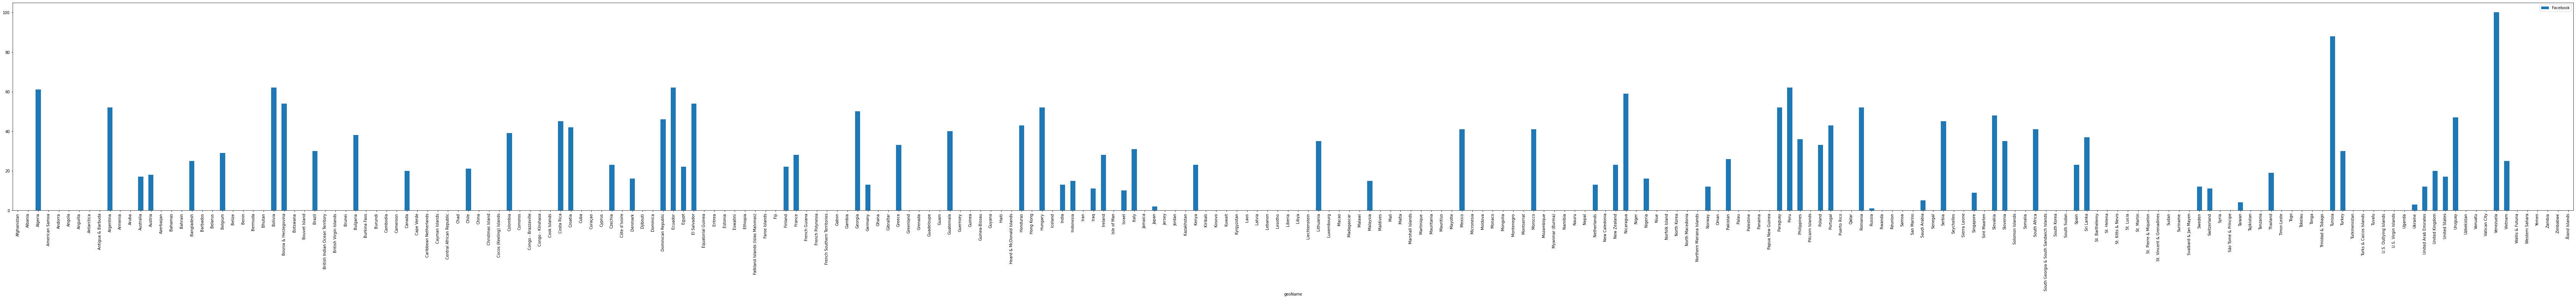

In [ ]:
df.reset_index().plot(x='geoName', y='Facebook', figsize=(120, 10), kind='bar')

### Build Payload | Option #2
Build_payload method is used in Pytrends to build a list of keywords you want to search in Google Trends. 

Try to search any term you find relavent or intresting. For this notebook I will be using 'Facebook' or ' Meta', due to the recent name change. 

In [ ]:
#Build Payload 

kw_list = ["Facebook"] # list of keywords to get data 

pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m')

For the code block above, we will search trends "Facebook" keyword. 

Below is Pytrends documentation template for building a Payload.

In [ ]:
# kw_list = ["Meta"]
# pytrend.build_payload(kw_list, cat=0, timeframe='today', geo='US', gprop='news')

# **Interest Over Time**

The next method we will call from pytreends is interest_over_time; This will return historial data from the searched keyword from Google Trend according to the timeframe you have specified in the build_payload method.


In [ ]:
pytrend.interest_over_time()



### Historical Hourly Interest 

To get the hourly interest of the keyword, you can use the get_historical_interset() method to fetch hourly data according to the time you have specified. 

In [ ]:
pytrend.get_historical_interest(kw_list, year_start=2021, month_start=9, day_start=1, hour_start=0, year_end=2021, month_end=9, day_end=30, hour_end=0, cat=0, geo='US', sleep=0)

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


""


### Interest By Region 

The method intrest_by_region from pytrends can show you which countries search the keyword you selected on a scale of 0 to 100, where 100 represents a country with the most search and 0 represents a country that does not have enough data. 

In [ ]:
pytrend.interest_by_region(resolution='US', inc_low_vol=True, inc_geo_code=False)

,Facebook
geoName,
Alabama,77
Alaska,84
Arizona,61
Arkansas,82
California,52
Colorado,65
Connecticut,62
Delaware,70
District of Columbia,43


**For Results Above**
Parameter Info - Resolution:

- 'City' reutrns city level data 
- 'COUNTRY' return country level data 
- 'DMA' returns Metro level dataa 
- 'Region' reutrns Region level data

Parameter info - Inc_low_vol:

- True/False (includes google trends data for low volume countries/ regions as well) 

Parameter Info - inc_geo_code:
- True/False (includes ISO codes of countries along with the names in the data) 




In [ ]:
#Other ways to pull intrest_by_region 
by_region = pytrends.interest_by_region(resolution='COUNTRY', 
                                        inc_low_vol=True, inc_geo_code=False)
by_region.head(10) 

In [ ]:
# by region greater than 10 searches 

# by_region[by_region["Facebook"] > 10]

## Related Topics

Pytrends can find words that are closely tied to a primary keyword of your choice and then return a list of related keywords on Google Trends. 

In [ ]:
pytrend.related_topics()

{'Meta': {'rising':     value  ...              topic_type
  0   32800  ...                     War
  1   16900  ...              Video game
  2   15100  ...                   Topic
  3   13250  ...         YouTube channel
  4   13050  ...                   Topic
  5   11150  ...                   Topic
  6    7250  ...                   Topic
  7    1200  ...                   Topic
  8    1100  ...  Nonprofit organization
  9     700  ...                   Topic
  10    650  ...      Fictional universe
  11    500  ...                   Topic
  12    450  ...              Video game
  13    350  ...             Online game
  14    350  ...                   Topic
  15    300  ...                   Topic
  16    300  ...                   Topic
  17    190  ...           Baseball team
  18    120  ...                   Topic
  19     80  ...  Retail banking company
  
  [20 rows x 6 columns],
  'top':     value formattedValue  ...            topic_title                     topic_type


### Related Queries

Will return related searches that correspond to your topic/keyword. 

In [ ]:
pytrends.related_queries()

{'Meta': {'rising':                             query  value
  0                   cold war meta  51450
  1                       2022 meta  47050
  2           warzone meta season 3  36550
  3           warzone season 3 meta  35100
  4            meta materials stock  26050
  5                   meta bank hrb  20150
  6              meta shades roblox  18350
  7            meta tax eip prenote  14900
  8              el amor es la meta  14300
  9                 little cup meta  13850
  10  how to get meta shades roblox  10850
  11   louisville meta softball bat  10500
  12             pokemon unite meta  10450
  13                  bullfrog meta   9100
  14                   hot tub meta   8950
  15                 kanto cup meta   8900
  16     little cup meta pokemon go   8900
  17             meta human creator   8850
  18   clash royale meta decks 2021   8800
  19         yugioh meta decks 2021   8800
  20       meta tags font generator   7500
  21               meta knight astd 

In [ ]:
df = pytrends.related_queries()

df['Facebook']['top']

,query,value
0,facebook down,100
1,facebook login,53
2,is facebook down,24
3,facebook not working,21
4,facebook outage,18
5,facebook stock,14
6,why is facebook not working,12
7,facebook lite,12
8,panne facebook,12
9,facebook störung,11


As you can see, there are different keywords related to "Facebook", such as the famous "Facebook Down" or "is facebook down". 

### Trending Searches



In [ ]:
# Will return trending searches in real time for the US. 
pytrends.trending_searches(pn='united_states') 

,0
0,Meta
1,Zayn Malik
2,Jada Pinkett Smith
3,Dorit Kemsley
4,Cristiano Ronaldo
5,Joakim Noah
6,Mike Trivisonno
7,Brandin Cooks
8,Ford stock
9,AMZN


In [ ]:
# Will return trending searches in Colombia 
pytrends.trending_searches(pn= 'colombia')

,0
0,Falabella
1,Junior Deportes Quindío
2,Adidas
3,Santa Fe Jaguares
4,Levante . Atlético Madrid
5,Panamericana
6,Meta
7,Velez
8,iShop
9,Bad Bunny


Above you can see which topics are trending in Colombia. I selected Colombia becuase earlier when I plotted a bar graph of which location from 0-100 has the highest total number of searches Colombia was on the top of the list. 

### Keyword Suggestion 

Google Trends can give you a list of keyword suggestions related to your primary keyword. 

In [ ]:
pytrends.suggestions('Meta')

[{'mid': '/m/08j19g', 'title': 'Metamizole', 'type': 'Drug'},
 {'mid': '/m/054tj', 'title': 'Metaphor', 'type': 'Topic'},
 {'mid': '/m/0jbk', 'title': 'Animal', 'type': 'Topic'},
 {'mid': '/m/03zr_d', 'title': 'Meta', 'type': 'Topic'},
 {'mid': '/m/053p5', 'title': 'Metabolism', 'type': 'Topic'}]

## Categories 

In [ ]:
pytrends.categories()

{'children': [{'children': [{'id': 184,
     'name': 'Celebrities & Entertainment News'},
    {'children': [{'id': 1104, 'name': 'Animated Films'},
      {'id': 317, 'name': 'Anime & Manga'},
      {'id': 319, 'name': 'Cartoons'},
      {'id': 318, 'name': 'Comics'}],
     'id': 316,
     'name': 'Comics & Animation'},
    {'children': [{'children': [{'id': 1108, 'name': 'Film & TV Awards'},
        {'id': 1117, 'name': 'Film & TV Production'}],
       'id': 1116,
       'name': 'Film & TV Industry'},
      {'children': [{'id': 1113, 'name': 'Music Awards'},
        {'id': 1114, 'name': 'Record Labels'}],
       'id': 1115,
       'name': 'Recording Industry'}],
     'id': 612,
     'name': 'Entertainment Industry'},
    {'children': [{'id': 188, 'name': 'Clubs & Nightlife'},
      {'id': 891, 'name': 'Concerts & Music Festivals'},
      {'id': 1086, 'name': 'Film Festivals'},
      {'id': 1273, 'name': 'Live Sporting Events'},
      {'id': 1085, 'name': 'Movie Listings & Theater Showt

# Conclusion 
This was my first attempt to use Google Trends API! My goal was to search Facebook, to see what countries had the highest searches, trends over time, and related searches. 